# **Nervousness_Detection using MObileNet CNN architecture**

**Overview**

The objective of nervousness detection using NERVOUS and NEUTRAL emotions is to develop an automated system that can accurately detect nervousness in facial expressions from images.
   
    **Advantages of MobileNet**

    MobileNets are small, low-latency, low-power models parameterized  
    to meet the resource constraints of a variety of use-cases. They can be
    built upon for classification, detection, embeddings and segmentation.


**DataSet Link**

https://drive.google.com/drive/folders/10_LYxbElgvZTtZCGf_aprqntUPB-lcGZ?usp=share_link

https://drive.google.com/drive/folders/1uVNH2DrqWLW-06xSGbx6ZUSfoZcekFt6?usp=share_link


## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, DepthwiseConv2D, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNet
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from keras.preprocessing import image
import os
sns.set()

# **Load Train Data**

In [ ]:

train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     rotation_range=30,
     width_shift_range = 0.1,
     height_shift_range = 0.1,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/train",
                                               target_size=(48,48),
                                               batch_size=64,
                                               class_mode='categorical',
                                  )


train_data.class_indices

Found 9072 images belonging to 2 classes.


{'nervous': 0, 'neutral': 1}

# **Load Test Data**

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/test",
                                           target_size=(48,48),
                                           batch_size=64,
                                           class_mode='categorical',
                                  )

Found 2257 images belonging to 2 classes.


# **Visualize Images**

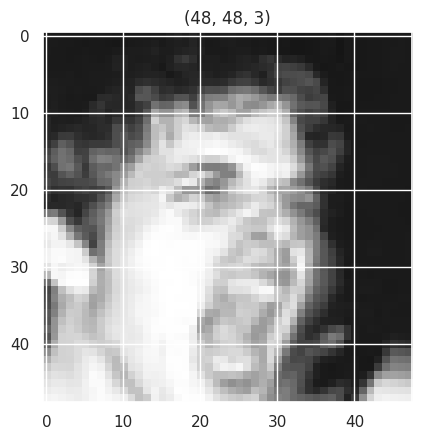

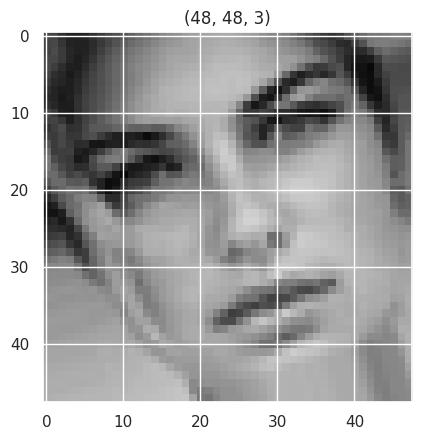

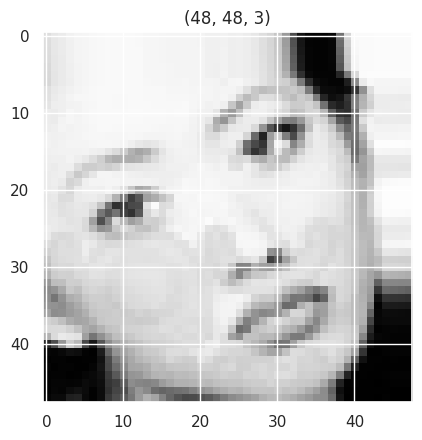

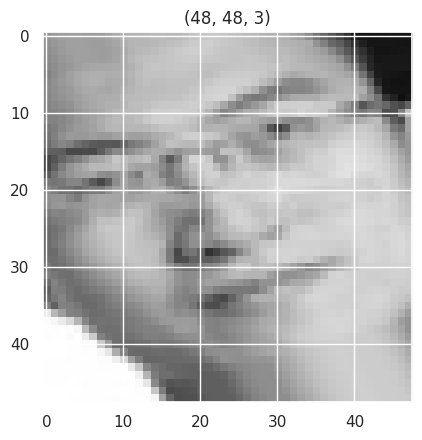

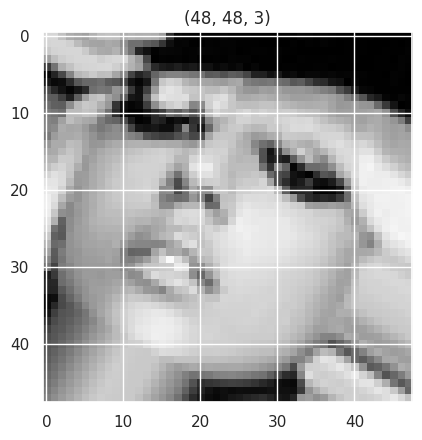

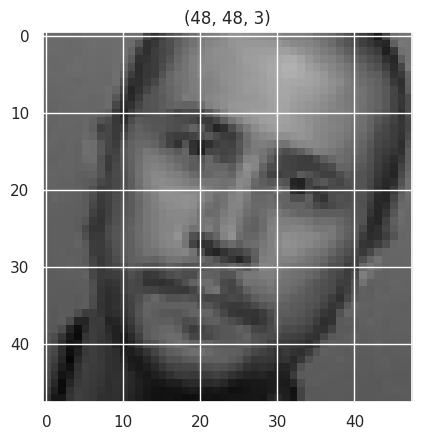

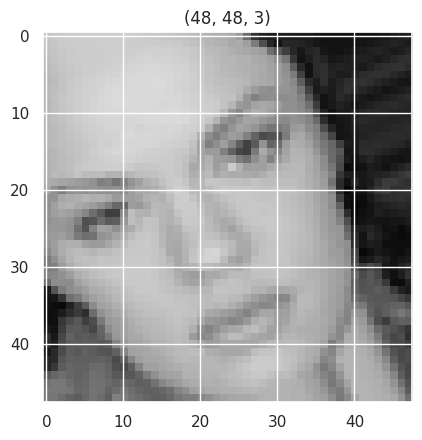

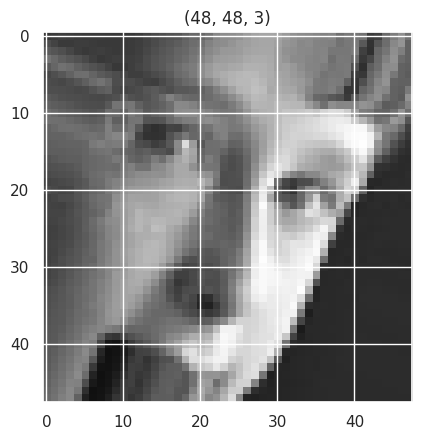

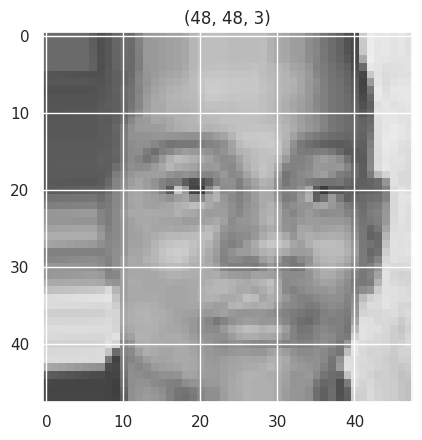

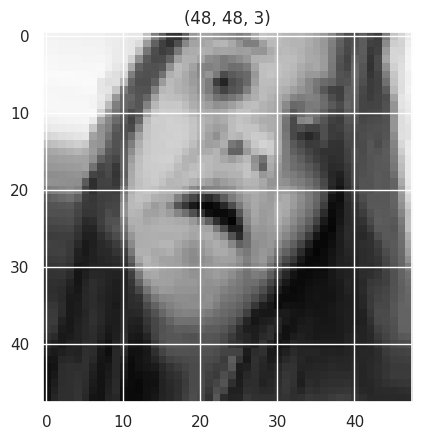

In [ ]:

t_img , label = train_data.next()

def plotImages(img_arr, label):

  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

plotImages(t_img, label)

# **Model Building**

In [ ]:
base_model = MobileNet( weights = 'imagenet', input_shape = (48,48,3), include_top = False )

for layer in base_model.layers[:-10]:
    layer.trainable = False

for layer in base_model.layers[-10:]:
    layer.trainable = True

x = base_model.output
x= Conv2D(filters = 32, kernel_size = (1,1), strides = (1,1), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

x= GlobalAveragePooling2D()(x)

x = Flatten()(x)

x = Dense(units = 256 , activation = 'relu' )(x)
x= Dropout(0.3)(x)

x = Dense(units = 512 , activation = 'relu' )(x)
x= Dropout(0.3)(x)

x = Dense(units=2 , activation = 'softmax' )(x)

model = Model(base_model.input, outputs = x)


17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy']  )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                                      

# **Model Training**

In [ ]:

checkpoint = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                          min_delta=0.01,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [ ]:
hist = model.fit(train_data, epochs = 25, validation_data = val_data, callbacks = callbacks_list)

Epoch 1/25
142/142 [==============================] - ETA: 0s - loss: 0.6296 - accuracy: 0.6433 
Epoch 1: val_accuracy improved from -inf to 0.61409, saving model to best_model.h5
142/142 [==============================] - 8005s 56s/step - loss: 0.6296 - accuracy: 0.6433 - val_loss: 0.6369 - val_accuracy: 0.6141 - lr: 0.0010
Epoch 2/25
142/142 [==============================] - ETA: 0s - loss: 0.5962 - accuracy: 0.6815
Epoch 2: val_accuracy improved from 0.61409 to 0.70536, saving model to best_model.h5
142/142 [==============================] - 25s 178ms/step - loss: 0.5962 - accuracy: 0.6815 - val_loss: 0.5898 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 3/25
142/142 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.6949
Epoch 3: val_accuracy did not improve from 0.70536
142/142 [==============================] - 26s 182ms/step - loss: 0.5842 - accuracy: 0.6949 - val_loss: 0.5979 - val_accuracy: 0.6974 - lr: 0.0010
Epoch 4/25
142/142 [==============================

# **Saving The Model**

In [ ]:
model = load_model('best_model.h5')

# **Plotting the Accuracy and Loss**

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

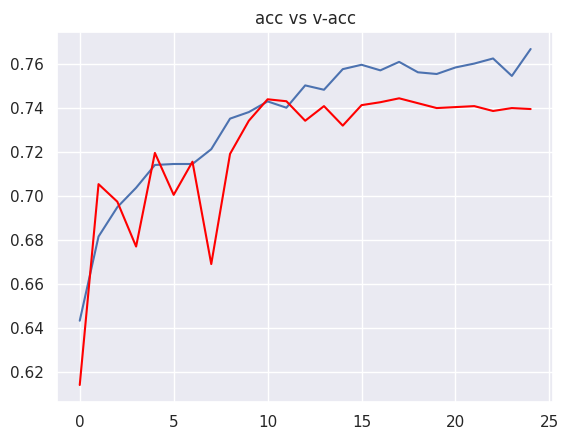

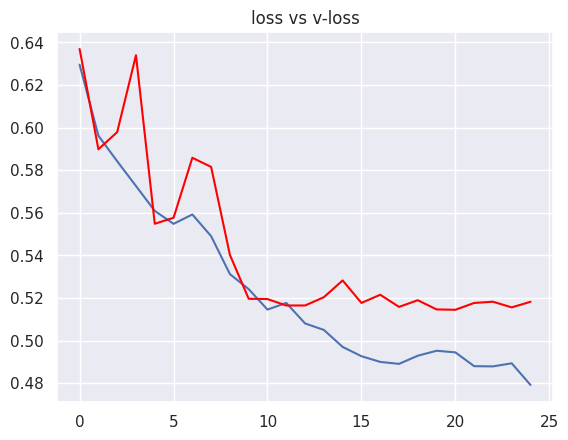

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

# **Prediction**

In [ ]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

{0: 'nervous', 1: 'neutral'}


1/1 [==============================] - 0s 22ms/step
 The image is of nervous


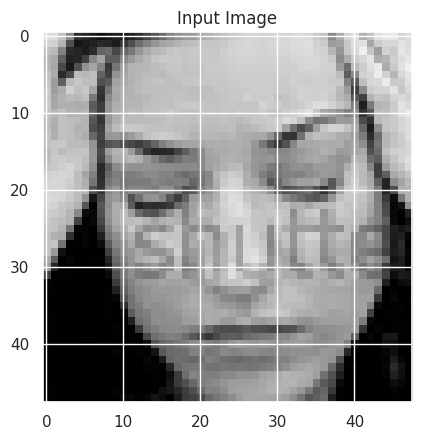

In [ ]:
# path for the image to see if it predics correct class

path = "/content/PrivateTest_902573.jpg"
img = load_img(path, target_size=(48,48) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()

1/1 [==============================] - 0s 20ms/step
 The image is of neutral


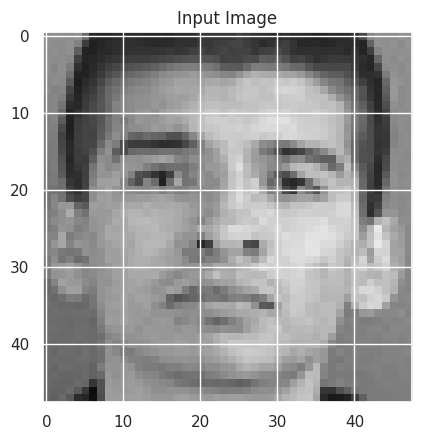

In [ ]:
# path for the image to see if it predics correct class

path = "/content/PrivateTest_1129340.jpg"
img = load_img(path, target_size=(48,48) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()